# Correlation Analysis

### Contents

**Pairplot** to visualize relationship, qualitative.

**Correlation matrix** -quantify relationship b/w numerical variables

**Heatmap** for visualizing the correlation

Scatterplot to check the correlation b/w 2 variables qualitatively.<br>
Correlation coefficient value can tell correlation quantitatively.

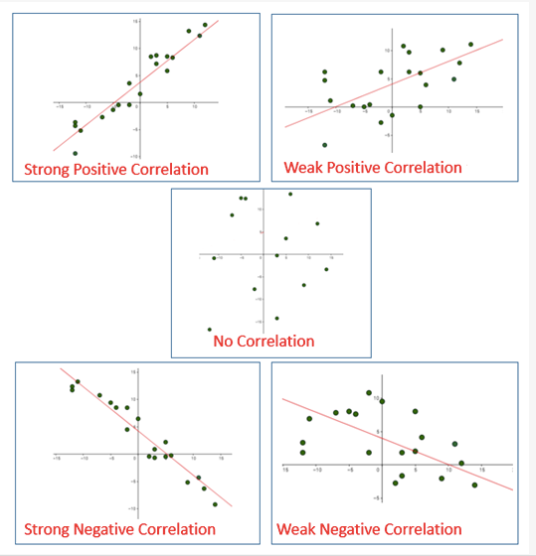


The sign of the linear correlation coefficient indicates the direction of the linear relationship between x and y. When r (the correlation coefficient) is near 1 or −1, the linear relationship is strong; when it is near 0, the linear relationship is weak.



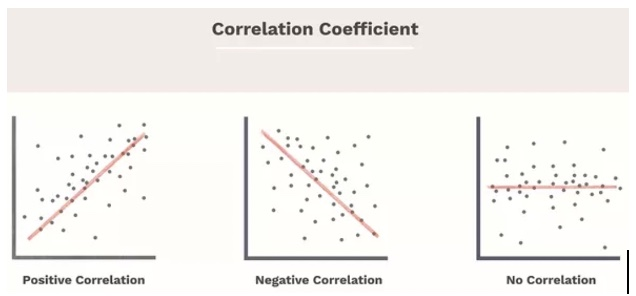

- Correlation coefficients are used to measure strength of **LINEAR relationship** b/w two variables.
- A correlation coefficient > 0 indicates +ve relationship i.e. as x increases, y also increases.
- A correlation coefficient < 0 indicates -ve relationship i.e. as x increases, y decreases.
- A correlation coefficient = 0 indicates no relationship b/w two variables being compared.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('insurance.csv')
print(insurance.shape)
insurance.head()
# Granularity - each row represents to each customer
# Expense can be the target column

(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Pairplot

- Pairplot plots only the numeric columns.
- Pairplot to check what impacts the target variable which is expense?
- Since only age, bmi, children & expenses are numeric col's hence we see those in pairplot.

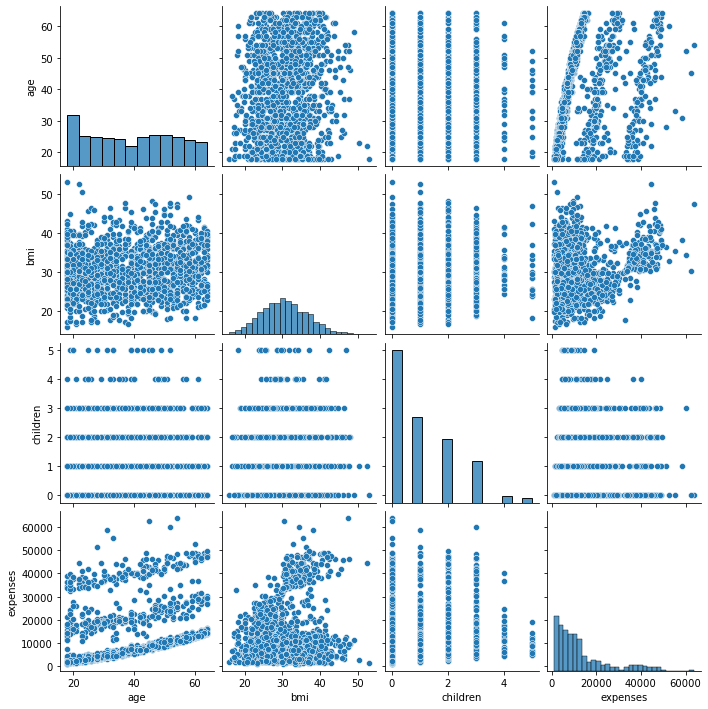

In [3]:
sns.pairplot(insurance);


### Calculating linear correlation using Pearson's r

Normally we use Pearson's correlation coefficient formula to calculate linear correlation as calculated below in insurance df.<br>
However there are other possibilities as well-

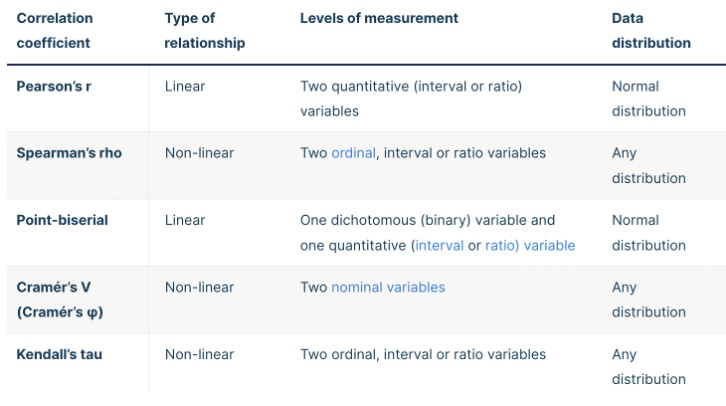

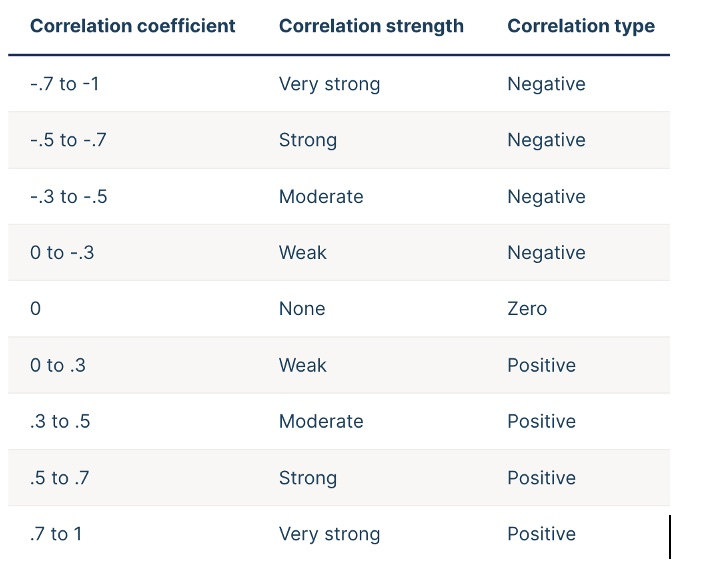

## Correlation Matrix

- Only for numerical data

In [4]:
corr1 = insurance.corr()
print(type(corr1))
corr1


<class 'pandas.core.frame.DataFrame'>


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [5]:
corr1.style.background_gradient()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


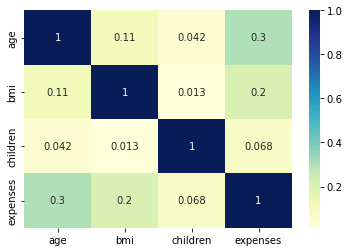

In [6]:
sns.heatmap(corr1, cmap="YlGnBu",annot=True);

Since all diagnol elements are highlighted but they convey no insights cz it is correlation of a variable to itself. Hence we change them to 0.

In [7]:
def diagnol_zero(df):
    for i in df.index:             #Index(['age', 'bmi', 'children', 'expenses'])
        for j in df.columns:
            if i==j:
                df.loc[i,j] = 0    # df.loc to access by labels
    return df
    
corr1 = diagnol_zero(corr1)
corr1

,age,bmi,children,expenses
age,0.000000,0.109341,0.042469,0.299008
bmi,0.109341,0.000000,0.012645,0.198576
children,0.042469,0.012645,0.000000,0.067998
expenses,0.299008,0.198576,0.067998,0.000000


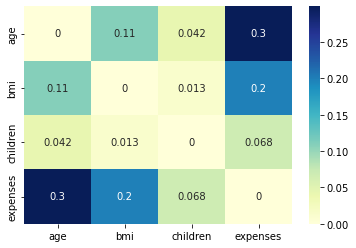

In [8]:
sns.heatmap(corr1, cmap="YlGnBu",annot=True);

###  Insights from this correlation matrix w.r.t target variable expenses

- Highest correlation found w.r.t medical expenses is for age which is 0.3 & then for bmi which is 0.2.
- Actually 0.3 is only considered a weak +ve correlation as per rules of correlation coefficient (refer to values of correlation coefficient in table above)



### Inorder to get some more insights we do a qualitative check using pairplot

We choose categorical column-smoker as hue in pairplot.

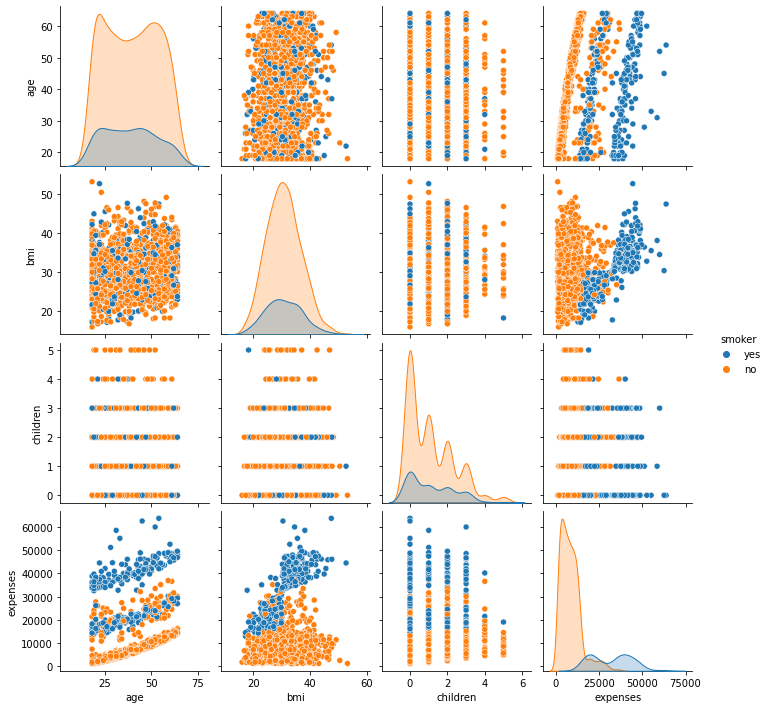

In [9]:
sns.pairplot(data=insurance, hue='smoker');

## Insights from Pairplot

- The diagnol elements are just univariate distribution plots, does not show any relationship w.r.t some other variables.
- All vertical and horizontal scatterplots are not significant as they just show constant values, no relationships.
- **Expenses w.r.t age** -> We see clearly that people who are smokers fall into higher expenses group & non-smokers into lower expenses group.So expense target variable has a relation with smoking.
- **Expenses w.r.t bmi** -> Usually people who r smokers have high expenses & expense seems to increase among smokers as their bmi increases.

- In general it seems smoker group has high expenses. So we can say that smoking is an important factor to determine target expenses. But smoking might not be such an important factor w.r.t age or bmi. For that we can engineer new features smoker_age and smoker_bmi to see if combined they have more effect on expenses.


**Note**

Since Smoking is important factor & correlated with expenses hence we change yes/no to numbers 1 and 0. In this way after changed to numeric we will be able to input this smoker feature to correlation matrix & check its strength of relationship to target variable expenses quantitatively.

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Change smoker and sex from categorical data to numerical data so they can be used further in correlation plot -(only takes numerical data) to check strength of relationship with target variable.

In [11]:
ins1 = insurance
ins1['is_smoker'] = ins1['smoker'].apply(lambda smoker: 1 if smoker == 'yes' else 0 )
ins1['sex'] = ins1['sex'].apply(lambda sex: 1 if sex == 'male' else 0 )
ins1.shape

(1338, 8)

In [12]:
# Move Expenses column to last for better understanding
ins1 = ins1.loc[:, ["age","bmi","children","sex","is_smoker","expenses"]]

ins1.head()

,age,bmi,children,sex,is_smoker,expenses
0,19,27.9,0,0,1,16884.92
1,18,33.8,1,1,0,1725.55
2,28,33.0,3,1,0,4449.46
3,33,22.7,0,1,0,21984.47
4,32,28.9,0,1,0,3866.86


Visualize correlation matrix to check relationship of encoded categorical columns smoker & sex w.r.t target expense.

In [13]:
corr2 = ins1.corr()
corr2.style.background_gradient()

,age,bmi,children,sex,is_smoker,expenses
age,1.000000,0.109341,0.042469,-0.020856,-0.025019,0.299008
bmi,0.109341,1.000000,0.012645,0.046380,0.003968,0.198576
children,0.042469,0.012645,1.000000,0.017163,0.007673,0.067998
sex,-0.020856,0.046380,0.017163,1.000000,0.076185,0.057292
is_smoker,-0.025019,0.003968,0.007673,0.076185,1.000000,0.787251
expenses,0.299008,0.198576,0.067998,0.057292,0.787251,1.000000


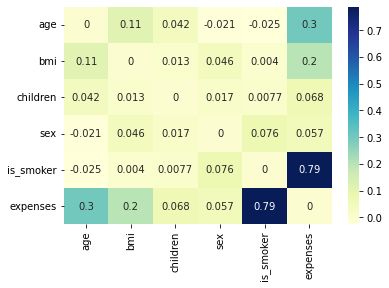

In [14]:
corr2 = diagnol_zero(corr2)
sns.heatmap(corr2, cmap="YlGnBu",annot=True);

## Feature Engineering

- For bmi & age we will have to choose a threshold value so we can change continuous data to discrete data. This is cz we need to make new features by multiply them with smoker.
- We make a new column is_bmi_high by choosing a threshold (e.g. 28) so if bmi of person is greater than 28 we encode as 1 else 0.
- We make a new column is_age_high by choosing a threshold (e.g. 50) so if age of person is greater than 50 we encode as 1 else 0.
- We make these new columns because from pairplot it was v clear that smoking is related with expenses however it was not very clear if smoking, bmi together could possibly make a better impact on target? From pairplot it seemed that as bmi and smoking were showing +ve correlation so we will try to check correlation coefficient for bmi_smoker.

- For smoking, age by observing pairplot it somewhat shows that smoking is prevelant for all age groups so maybe this factor age_smoker will not come out to be very correlated.

- For bmi_smoker and age_smoker after deciding threshold & changing to discrete data you can now multiply them make new features & see if they correlate with expenses better.

In [15]:
ins2 = ins1
ins2['is_bmi_high'] = ins2['bmi'].apply(lambda bmi: 1 if bmi > 28 else 0 )
ins2['is_age_high'] = ins2['age'].apply(lambda age: 1 if age > 50 else 0 )

ins2['bmi_smoker'] = ins2['is_bmi_high'] * ins2['is_smoker']
ins2['age_smoker'] = ins2['is_age_high'] * ins2['is_smoker']

In [16]:
ins2 = ins2.loc[:, ["age","bmi","children","sex","is_smoker","is_bmi_high","is_age_high",
                    "bmi_smoker","age_smoker","expenses"]]

ins2.head()

,age,bmi,children,sex,is_smoker,is_bmi_high,is_age_high,bmi_smoker,age_smoker,expenses
0,19,27.9,0,0,1,0,0,0,0,16884.92
1,18,33.8,1,1,0,1,0,0,0,1725.55
2,28,33.0,3,1,0,1,0,0,0,4449.46
3,33,22.7,0,1,0,0,0,0,0,21984.47
4,32,28.9,0,1,0,1,0,0,0,3866.86


In [17]:
print(ins2.shape,'\n')
ins2.info()

(1338, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   bmi          1338 non-null   float64
 2   children     1338 non-null   int64  
 3   sex          1338 non-null   int64  
 4   is_smoker    1338 non-null   int64  
 5   is_bmi_high  1338 non-null   int64  
 6   is_age_high  1338 non-null   int64  
 7   bmi_smoker   1338 non-null   int64  
 8   age_smoker   1338 non-null   int64  
 9   expenses     1338 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


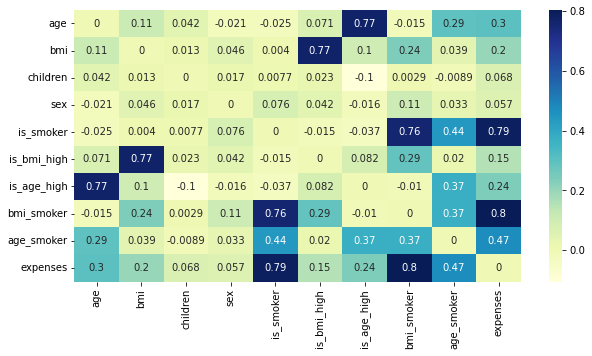

In [18]:
corr3 = ins2.corr()
corr3 = diagnol_zero(corr3)

plt.figure(figsize = (10,5))   # U can use plt functions with seaborn
sns.heatmap(corr3, cmap="YlGnBu",annot=True);